<a href="https://colab.research.google.com/github/sabrilben/FIFA21_ML/blob/main/FIFA21_Supervised_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Description

In this project, we will use Supervised Learning Model to identify which players that are above average based on FIFA21 Dataset.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model.

## Import library

In [1]:
# Write any package/module installation that we need. This helps declutter the output below
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## Load and clean the dataset

In this task, we will obtain the **FIFA 21 Dataset** from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv). I have downloaded the dataset and uploaded it to my GitHub repository to facilitate easier data loading and to prevent any errors due to potential changes in the dataset.

>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)


#### Load dataset

In [2]:
# Load the data
path = 'https://raw.githubusercontent.com/sabrilben/FIFA21_ML/main/FIFA21_official_data.csv'
fifa_df = pd.read_csv(path)
fifa_df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,13.0,48.0,51.0,56.0,40.0,56.0,GK,49.0,€120K,NaN
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,10.0,52.0,55.0,52.0,42.0,57.0,GK,51.0,€83K,5.0
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,11.0,50.0,49.0,50.0,53.0,55.0,GK,51.0,€149K,8.0
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,10.0,50.0,51.0,49.0,50.0,51.0,GK,49.0,€94K,8.0


In [3]:
# Check available columns in the data
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

#### Pick Necessary Columns

In [4]:
# Choose only necessary columns, which are numerical columns
num_column = ['Overall','Age','Potential','Value','Wage','International Reputation','Weak Foot','Skill Moves','Height','Weight','Crossing','Finishing',
              'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed',
              'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
              'Vision','Penalties','Composure','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes',
              'DefensiveAwareness']

fifa_num = fifa_df[num_column]
fifa_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   17108 non-null  int64  
 1   Age                       17108 non-null  int64  
 2   Potential                 17108 non-null  int64  
 3   Value                     17108 non-null  object 
 4   Wage                      17108 non-null  object 
 5   International Reputation  17108 non-null  float64
 6   Weak Foot                 17108 non-null  float64
 7   Skill Moves               17108 non-null  float64
 8   Height                    17108 non-null  object 
 9   Weight                    17108 non-null  object 
 10  Crossing                  17108 non-null  float64
 11  Finishing                 17108 non-null  float64
 12  HeadingAccuracy           17108 non-null  float64
 13  ShortPassing              17108 non-null  float64
 14  Volley

#### Manipulate 'Value' & 'Wage' Columns

In [5]:
# Remove '€' characters
fifa_num = fifa_num.replace('€', '', regex=True)

# Convert 'M' (as in Million) and 'K' (as in Kilo/Thousand) to numeric
def convert_value(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
    return float(value)

fifa_num[['Value', 'Wage']] = fifa_num[['Value', 'Wage']].applymap(convert_value).astype(int)
print(fifa_num[['Value', 'Wage']])

          Value    Wage
0      31500000  115000
1      87000000  370000
2      63000000  195000
3      50500000  290000
4      22000000   41000
...         ...     ...
17103     50000     500
17104     50000     500
17105     60000     500
17106     50000     500
17107     50000     500

[17108 rows x 2 columns]


<ipython-input-5-514112d9648e>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fifa_num[['Value', 'Wage']] = fifa_num[['Value', 'Wage']].applymap(convert_value).astype(int)


#### Manipulate 'Height' & 'Weight' Columns

In [6]:
# Define a function to convert height to inches
def height_to_inch(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches)
    return feet * 12 + inches

# Apply the function to the 'Height' column
fifa_num['Height'] = fifa_num['Height'].apply(height_to_inch)
fifa_num['Height']

# Remove lbs characters
fifa_num = fifa_num.replace('lbs', '', regex=True)
fifa_num['Weight'] = fifa_num['Weight'].astype(int)

# Display the first few rows of the dataframe
fifa_num[['Height','Weight']].head()

,Height,Weight
0,72,190
1,71,154
2,70,152
3,69,161
4,68,152


In [7]:
fifa_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   17108 non-null  int64  
 1   Age                       17108 non-null  int64  
 2   Potential                 17108 non-null  int64  
 3   Value                     17108 non-null  int64  
 4   Wage                      17108 non-null  int64  
 5   International Reputation  17108 non-null  float64
 6   Weak Foot                 17108 non-null  float64
 7   Skill Moves               17108 non-null  float64
 8   Height                    17108 non-null  int64  
 9   Weight                    17108 non-null  int64  
 10  Crossing                  17108 non-null  float64
 11  Finishing                 17108 non-null  float64
 12  HeadingAccuracy           17108 non-null  float64
 13  ShortPassing              17108 non-null  float64
 14  Volley

#### Remove & Impute Missing Values

In [8]:
# Remove rows w/ missing values considering those are less than 0.5% of the data:
# Volleys, Curve, Agility, Balance, Jumping, Interception,Positioning, Vision, SlidingTackle
fifa_num.dropna(subset=['Volleys','Curve','Agility','Balance','Jumping','Interceptions','Positioning','Vision','SlidingTackle'], inplace=True)
fifa_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17069 entries, 0 to 17107
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   17069 non-null  int64  
 1   Age                       17069 non-null  int64  
 2   Potential                 17069 non-null  int64  
 3   Value                     17069 non-null  int64  
 4   Wage                      17069 non-null  int64  
 5   International Reputation  17069 non-null  float64
 6   Weak Foot                 17069 non-null  float64
 7   Skill Moves               17069 non-null  float64
 8   Height                    17069 non-null  int64  
 9   Weight                    17069 non-null  int64  
 10  Crossing                  17069 non-null  float64
 11  Finishing                 17069 non-null  float64
 12  HeadingAccuracy           17069 non-null  float64
 13  ShortPassing              17069 non-null  float64
 14  Volleys    

In [9]:
# Impute empty values in 'Composure' & 'DefensiveAwareness', considering those are more than 5% of the data
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the dataset
fifa_imputed = pd.DataFrame(imputer.fit_transform(fifa_num), columns=fifa_num.columns)

# Display the result
fifa_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17069 entries, 0 to 17068
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   17069 non-null  float64
 1   Age                       17069 non-null  float64
 2   Potential                 17069 non-null  float64
 3   Value                     17069 non-null  float64
 4   Wage                      17069 non-null  float64
 5   International Reputation  17069 non-null  float64
 6   Weak Foot                 17069 non-null  float64
 7   Skill Moves               17069 non-null  float64
 8   Height                    17069 non-null  float64
 9   Weight                    17069 non-null  float64
 10  Crossing                  17069 non-null  float64
 11  Finishing                 17069 non-null  float64
 12  HeadingAccuracy           17069 non-null  float64
 13  ShortPassing              17069 non-null  float64
 14  Volley

## Build and Train the model

Now that the data is cleaned, we will analyze it and select the best features for predicting if a player is 'Valuable'. The detail steps to do this will be as below.

1. **Define the target output**: We will set a threshold where players with an "Overall" score of 75 or higher are considered 'Valuable'.

2. **Identify the features**: We will use three methods to find the best features for predicting a 'Valuable' player.
   *   Correlation
   *   Random Forest
   *   Statistical Test using ANOVA

3. **Split the data**: We will divide the data into Training and Testing/Validation sets.

4. **Scale the features**: Since the range of values for each feature varies, we will scale them to ensure optimal model performance.

5. **Train the model**: We will train our model and choose the best algorithm for accurate predictions.

6. **Evaluate the model**: We will test the model's effectiveness by making predictions on the Testing/Validation set and evaluating the results.

### Define the Target Output

In [10]:
# Define the target output (Good >= 75)
fifa_imputed['OK Player'] = fifa_imputed['Overall'].apply(lambda x: 1 if x >= 75 else 0)

### Identify the Features

To select the best features for the model, we will compare the results of several feature selection techniques:
*   **Correlation:** Identify features that are highly correlated with the 'Overall' column.
*   **Random Forest:** Determine features with the highest importance scores.
*   **ANOVA:** Find features with the most significant scores.

#### Correlation

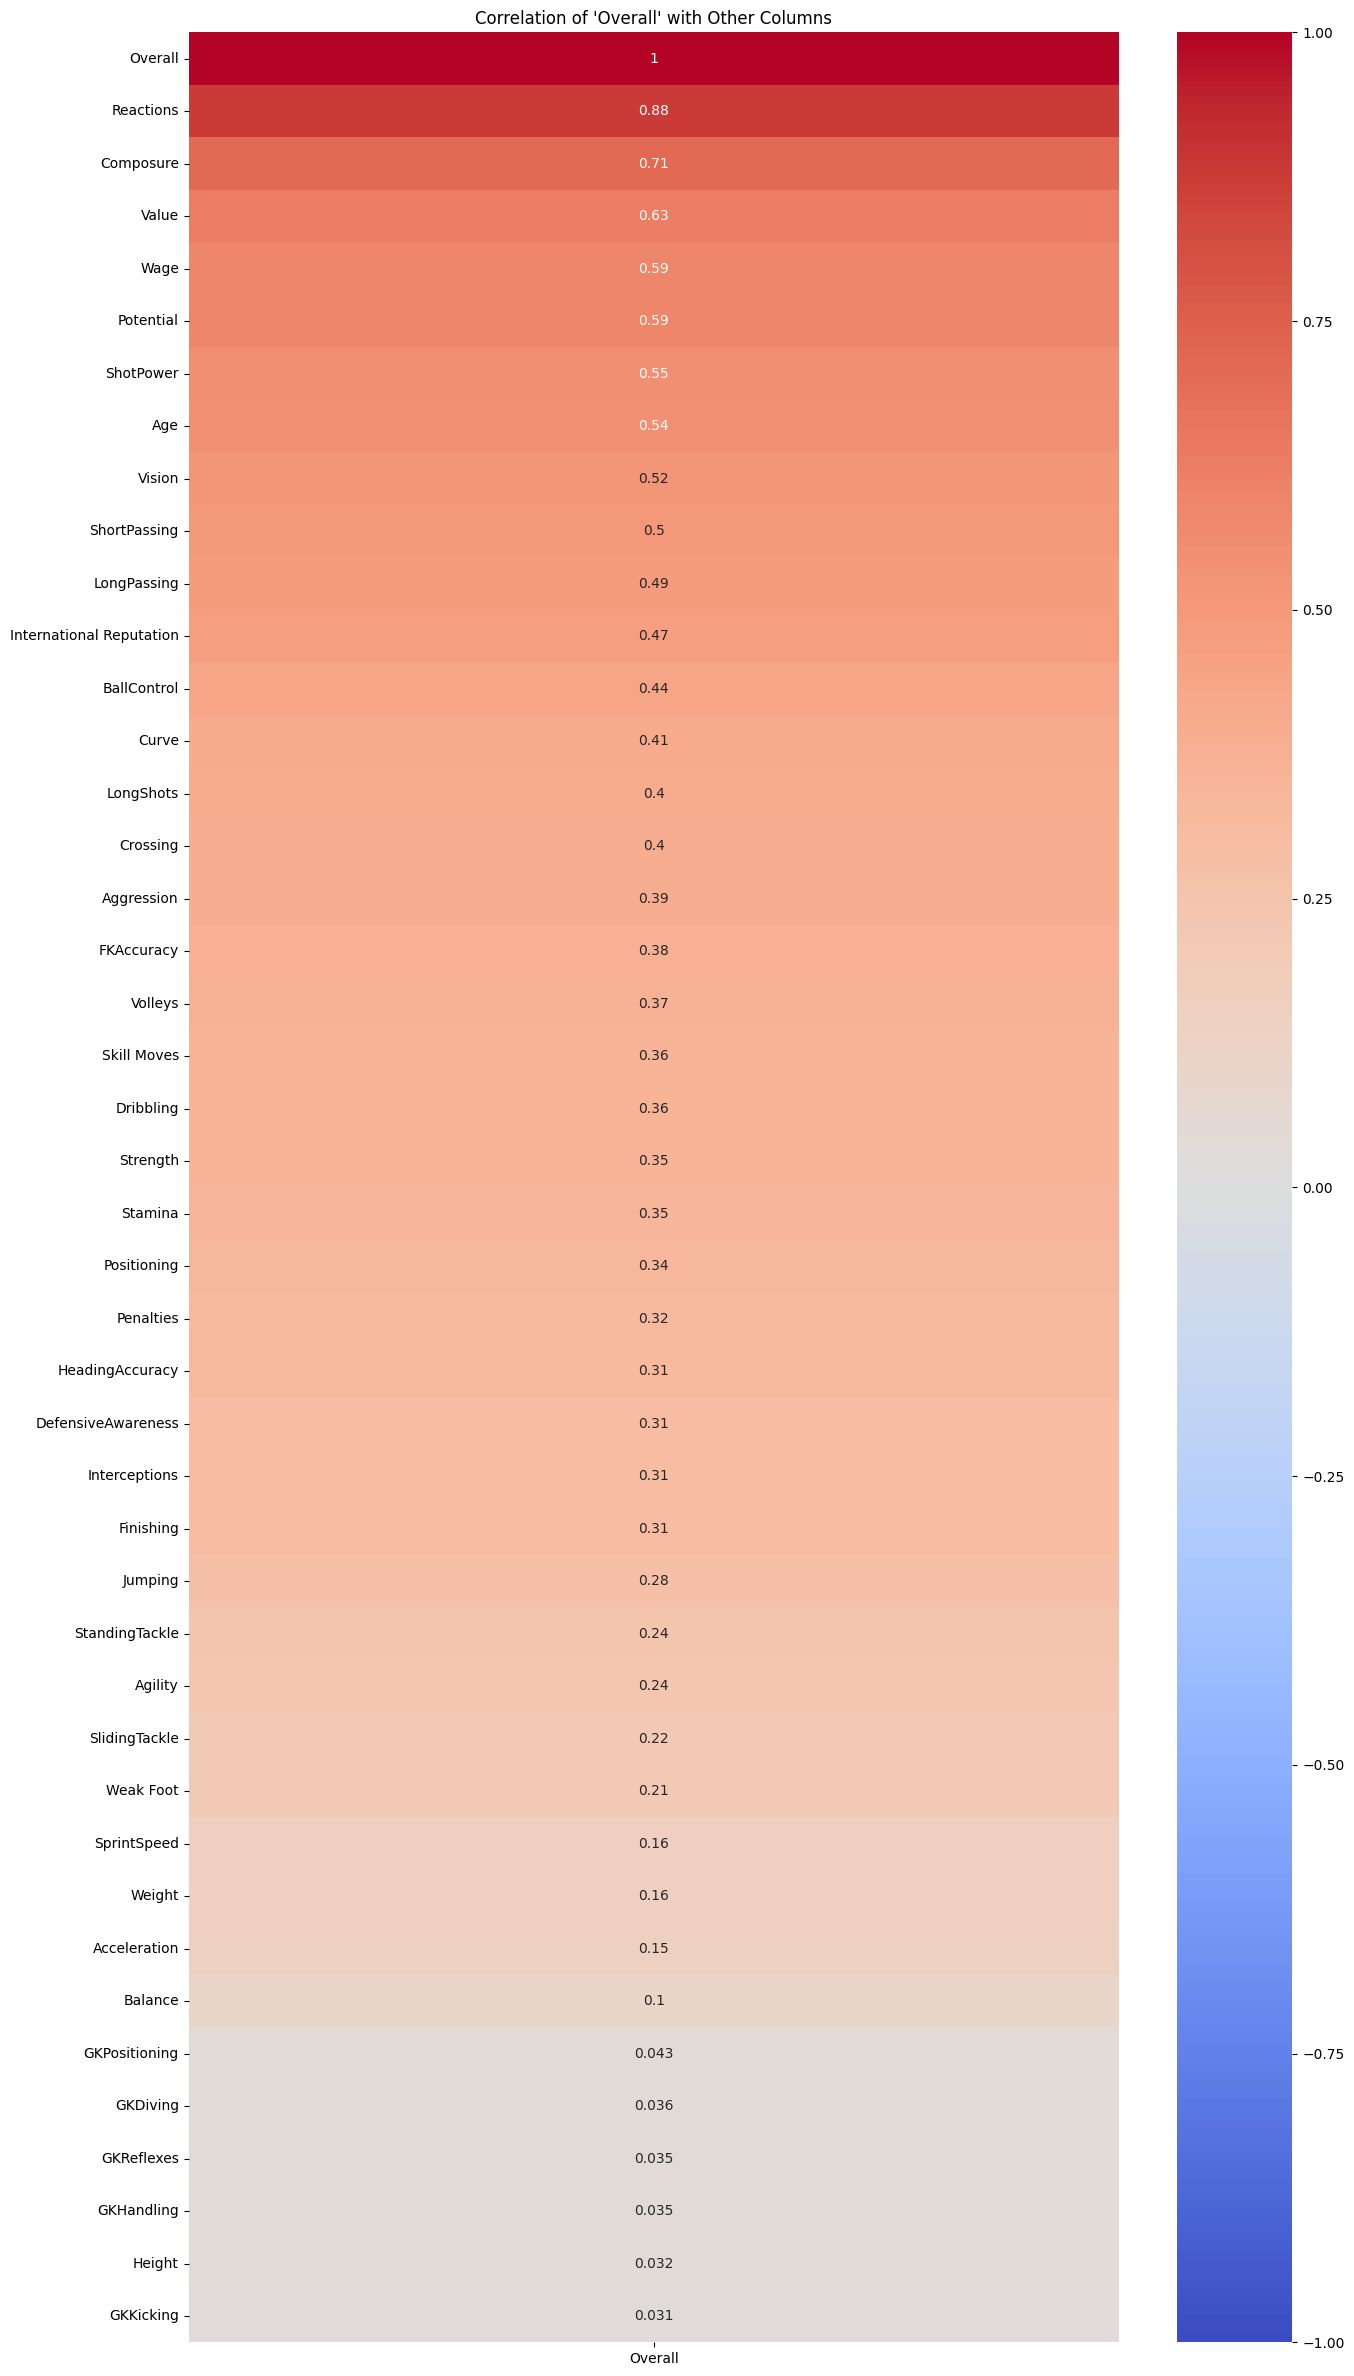

In [11]:
# Calculate the correlation matrix
corr_col = fifa_imputed.drop(['OK Player'], axis=1)
correlation_matrix = corr_col.corr()

# Extract the correlation of 'Overall' with other columns
overall_correlation = correlation_matrix[['Overall']].sort_values(by='Overall', ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(15, 30))
sns.heatmap(overall_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of 'Overall' with Other Columns")
plt.show()


#### Random Forest

In [12]:
# Define features and target
X = fifa_imputed.drop(['Overall', 'OK Player'], axis=1)
y = fifa_imputed['OK Player']

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print(feature_importance_df)

# Cumulative importance threshold (e.g., 90%)
cumulative_importance = feature_importance_df['importance'].cumsum()
selected_features = feature_importance_df[cumulative_importance <= 0.90]['feature']

print(selected_features)


2                        Value
22                   Reactions
1                    Potential
3                         Wage
18                 BallControl
12                ShortPassing
34                   Composure
0                          Age
30               Interceptions
35              StandingTackle
4     International Reputation
36               SlidingTackle
14                   Dribbling
31                 Positioning
37                    GKDiving
32                      Vision
40               GKPositioning
38                  GKHandling
42          DefensiveAwareness
9                     Crossing
17                 LongPassing
Name: feature, dtype: object


#### ANOVA

In [13]:
# Define features and target
X = fifa_imputed.drop(['Overall', 'OK Player'], axis=1)
y = fifa_imputed['OK Player']

# Apply SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['Potential', 'Value', 'Wage', 'International Reputation',
       'ShortPassing', 'LongPassing', 'Reactions', 'ShotPower', 'Vision',
       'Composure'],
      dtype='object')


#### Features to Use

Combining the results of **Correlation**, **Random Forest**, & **ANOVA**, I've decided to use the features below.

In [14]:
# Identify the features we will use in our model
ml_features = ['Reactions','Composure','Value','Wage','Potential',
               'ShotPower','Age','Vision','ShortPassing']

### Split the Data

In [15]:
# Split data into training set and test set

# Define our features and target
X = fifa_imputed[ml_features]
y = fifa_imputed[['OK Player']]

# Split the data into training and test using scikit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True) # Make sure it's shuffled

# Check split result
for df in [X_train, X_test, y_train, y_test]:
  print(df.shape)


(12801, 9)
(4268, 9)
(12801, 1)
(4268, 1)


In [16]:
#Check the percentage of training data
12801/(12801+4268)

0.7499560606948269

### Scale the Features

In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the feature columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)

# Combine the standardized features with the target column
fifa_scaled = pd.concat([X_train_scaled, y], axis=1)

# Display the first few rows of the scaled dataframe
fifa_scaled.head()


,Reactions,Composure,Value,Wage,Potential,ShotPower,Age,Vision,ShortPassing,OK Player
0,-0.287455,-0.223652,-0.410816,-0.306968,-1.669033,0.197863,0.807738,0.565852,0.265661,1
1,-0.287455,0.363793,-0.387503,-0.452685,-0.970730,-1.803334,0.401680,-1.684619,-0.088146,1
2,0.688108,0.615555,0.041455,0.022069,-0.097850,0.864929,0.198651,1.001426,0.690230,1
3,-0.504247,2.042208,-0.201000,-0.400979,0.251301,1.680232,1.619853,0.928831,1.114799,1
4,-0.287455,-0.307573,-0.410816,-0.353974,-0.621578,-2.322164,-0.207406,-1.103852,-0.795762,1


### Train the Model

Since we are trying to predict whether a player is an 'OK Player' or 'Not OK Player', here we will use a Classification Model, specifically **Logistic Regression**.

In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Evaluate the Model

#### Make Predictions

In [19]:
# Make predictions using the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Convert continuous predictions to binary class labels
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Evaluate Model

In [20]:
# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {ml_accuracy}")
print(f"F1-score: {ml_f1_score}")

Accuracy: 0.978912839737582
F1-score: 0.9187725631768953
